# 1 - Performance Data

**Requirements:**
- Key to the Duramat API

**Objectives:**
1. Read in performance data from the bifacial field
2. Plot monthly performance by row
3. Plot bifacial gain

In [ ]:
# if running on google colab, uncomment the next line and execute this cell to install the dependencies and prevent "ModuleNotFoundError" in later cells:
# pip install -r ../requirements.txt

In [1]:
import os
import pandas as pd
import json
import pprint as pp
import urllib.request as ur
import urllib.parse as up

In [2]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)


Working on a  Windows 10
Python version  3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.1.0


In [33]:
dataset_id ='72334fe1-fa52-45f8-a43c-836a35b9c526'  # For BEST Field Data
resource_id='1c3ac2d9-4734-49b5-b1e7-577a4cc62d80'  # 'BEST_Data.csv'

# Set your API token. Since this is open-source data, not really needed.
api_token = ''

# build url pieces
emn_datahub = 'https://datahub.duramat.org'

# Helper to build a URI for a given API action
action = lambda a: '{}/api/3/action/{}'.format(emn_datahub, a)        
params = {
    'id': dataset_id,
}
param_string = up.urlencode( params )
#Build composite url for request
url = action('package_show') + '?' + param_string
# https://datahub.duramat.org/api/3/action/package_show
request = ur.Request(url)
# Add authorization
#request.add_header('Authorization', self.dhkey)
response = ur.urlopen(request)
dataset = json.loads(response.read().decode('utf-8'))   

# Find the resource with the specified resource_id
resource_url = None
for resource in dataset['result']['resources']:
    if resource['id'] == resource_id:
        resource_url = resource['url']
        break

if resource_url is None:
    raise ValueError(f'Resource with id {resource_id} not found in dataset {dataset_id}')

#Download the public CKAN url directly to pandas. Note! If you have the actual URL from browsing
#the data hub, you can simply place that resource download URL directly into a pandas read_csv() 
#call.
df = pd.read_csv(resource_url)

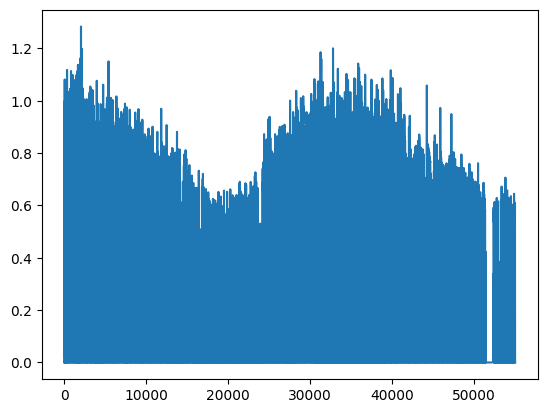

In [34]:
plt.plot(df['Yf8'])

In [35]:
df.keys()

Index(['Unnamed: 0', 'row2dcp', 'row2Gpoa_front', 'row2kWh', 'row2dcv',
       'row2dci', 'row2tmod', 'Yf2', 'PR2', 'row8dcp', 'row8Gpoa_front',
       'row8Gpoa_rear', 'Yf8', 'PR8', 'row9dcp', 'row9Gpoa_front',
       'row9Gpoa_rear', 'row9kWh', 'row9dcv', 'row9dci', 'row9tmod', 'Yf9',
       'PR9', 'poa_irradiance_front_IMT', 'poa_irradiance_rear_IMT_West',
       'poa_irradiance_rear_IMT_CenterWest',
       'poa_irradiance_rear_IMT_CenterEast', 'poa_irradiance_rear_IMT_East',
       'poa_irradiance_front_licor', 'poa_irradiance_rear_licor',
       'poa_irradiance_front_cm11', 'poa_irradiance_rear_cm11',
       'sunkitty_albedo_1', 'sunkitty_GRI_CM22', 'sunkitty_GHI_CM22',
       'sunkitty_albedo_2', 'sunkitty_GRI_IMT', 'sunkitty_GHI_IMT',
       'sunkitty_albedo_3', 'sunkitty_GRI_AP', 'sunkitty_GHI_AP',
       'Hydra_current_1', 'Hydra_current_2', 'Hydra_current_3',
       'Hydra_current_4', 'Hydra_current_5', 'Hydra_current_6',
       'Hydra_current_7', 'Hydra_current_8', 'Hydra_cu